In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
)

c:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore')

Load dataset, the dataset is in csv format


In [3]:
dataset_train = pd.read_csv("./data/train.csv").drop(columns="label")
label_train = pd.read_csv("./data/train.csv")["label"]
dataset_test = pd.read_csv("./data/test.csv")

<h1>Using Machine Learning


In [4]:
train_data, test_data, train_label, test_label = train_test_split(
    dataset_train.to_numpy(), label_train.to_numpy(), test_size=0.2
)

In [5]:
def evaluation_performance(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(
        y_true, y_pred, pos_label="positive", average="micro"
    )
    rec = recall_score(y_true, y_pred, pos_label="positive", average="micro")
    return {"Accuracy: ": acc, "Precision: ": pre, "Recall: ": rec}

In [6]:
ml_model_knn = KNeighborsClassifier(n_neighbors=1)
ml_model_knn.fit(train_data, train_label)

KNeighborsClassifier(n_neighbors=1)

In [7]:
ml_model_lg = LogisticRegression()
ml_model_lg.fit(train_data, train_label)

LogisticRegression()

In [8]:
y_pred_knn = ml_model_knn.predict(test_data)
y_pred_lg = ml_model_lg.predict(test_data)

In [9]:
evaluation_performance(test_label, y_pred_knn)

{'Accuracy: ': 0.9676190476190476,
 'Precision: ': 0.9676190476190476,
 'Recall: ': 0.9676190476190476}

In [10]:
evaluation_performance(test_label, y_pred_lg)

{'Accuracy: ': 0.9153571428571429,
 'Precision: ': 0.9153571428571429,
 'Recall: ': 0.9153571428571429}

<h1> Using CNN


Checking the shape of dataset. We can see that there are 748 column, each column save the value of one pixel in the image


In [11]:
dataset_train.shape

(42000, 784)

In [12]:
dataset_test.shape

(28000, 784)

The idea of this step is transform the csv into image with test and train data. The label of train data will be save into another list for training


In [13]:
def create_image(dataset, label=None):
    labels_data = []
    images_data = []
    for idx, row in dataset.iterrows():
        image = row.to_numpy(dtype=int).reshape(28, 28)
        images_data.append(image / 255.0)
        if label is not None:
            labels_data.append(label.loc[idx])
    return labels_data, images_data

In [14]:
labels_data, train_images_data = create_image(dataset_train, label_train)
_, test_images_data = create_image(dataset_test)

Labeling the dataset. I'm using the onehot encoder here <br>
For example with the value of label is 5 encoder will be: [0 0 0 0 1 0 0 0 0 0]


In [15]:
lb_encoder = LabelBinarizer()
labels_data = lb_encoder.fit_transform(labels_data)

In [16]:
train_images_data = np.array(train_images_data)
labels_data = np.array(labels_data)
test_images_data = np.array(test_images_data)

In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(
    train_images_data, labels_data, test_size=0.2
)

Create a new model with 2 Convolution 2D layers then using MaxPooling2D to find the core features of the image.<br>
I'm using kernel matrix with shape (3, 3)


In [18]:
model = Sequential()

model.add(
    Conv2D(
        32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)
    )
)

model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [19]:
model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

In [20]:
X_train.shape

(33600, 28, 28)

In [21]:
H = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    batch_size=32,
    epochs=10,
    verbose=1,
)

Epoch 1/10


1050/1050 [==============================] - 14s 5ms/step - loss: 0.1541 - accuracy: 0.9532 - val_loss: 0.0724 - val_accuracy: 0.9790
Epoch 2/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0676 - val_accuracy: 0.9805
Epoch 3/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0592 - val_accuracy: 0.9836
Epoch 5/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0141 - accuracy: 0.9950 - val_loss: 0.0594 - val_accuracy: 0.9845
Epoch 6/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0681 - val_accuracy: 0.9846
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0607 - val_accuracy: 0.9867
Ep

The last epoch shown that the model have about 98.61% of accuracy and value loss is 0.0639


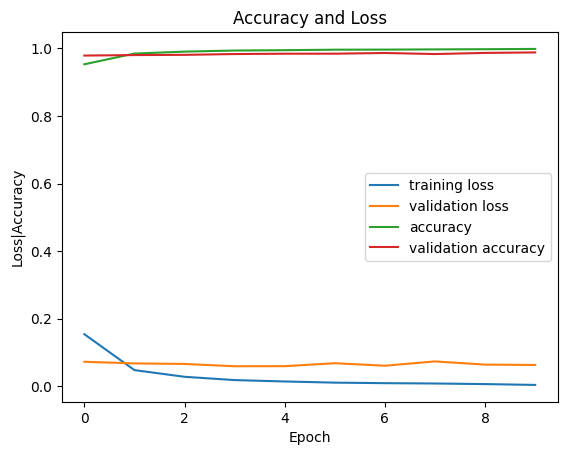

In [22]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history["loss"], label="training loss")
plt.plot(
    np.arange(0, numOfEpoch), H.history["val_loss"], label="validation loss"
)
plt.plot(np.arange(0, numOfEpoch), H.history["accuracy"], label="accuracy")
plt.plot(
    np.arange(0, numOfEpoch),
    H.history["val_accuracy"],
    label="validation accuracy",
)
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss|Accuracy")
plt.legend()

Try to predict with my model: <br>
y_predict will return the probability of each index.<br>
For example [[5.0830229e-11 3.6931352e-13 1.3793825e-08 4.2259707e-09 2.6501913e-12
  1.6988721e-11 8.5548893e-16 9.3541211e-15 1.0000000e+00 1.5526247e-08]]<br>
It's mean the highest probability is number 8


1/1 [==============================] - 0s 127ms/step
The value is: 7
The value of knn is: 7
The value of lg is: 7


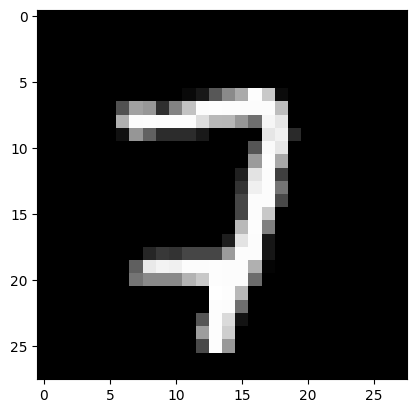

In [23]:
ran_num = rd.randrange(len(test_images_data))
plt.imshow(test_images_data[ran_num].reshape(28, 28), cmap="gray")
y_predict = model.predict(test_images_data[ran_num].reshape(1, 28, 28, 1))
y_predict_knn = ml_model_knn.predict(
    test_images_data[ran_num].reshape(1, -1)
    * 255.0  # because I normalize the image to put in to CNN but I trained ml with original data
)
y_predict_lg = ml_model_lg.predict(
    test_images_data[ran_num].reshape(1, -1)
    * 255.0  # because I normalize the image to put in to CNN but I trained ml with original data
)
print(f"The value is: {np.argmax(y_predict)}")
print(f"The value of knn is: {y_predict_knn[0]}")
print(f"The value of lg is: {y_predict_lg[0]}")